In [322]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit


In [323]:
t = np.random.uniform(20, 35, 100)
t.sort()
def periodic_func(a, uncertainty):
    f = a[0] + a[1]*t + a[2]*np.sin(a[4] * t) + a[3]*np.cos(a[4] * t) + np.random.normal(scale=uncertainty, size=len(t))
    return f

Lets test our function

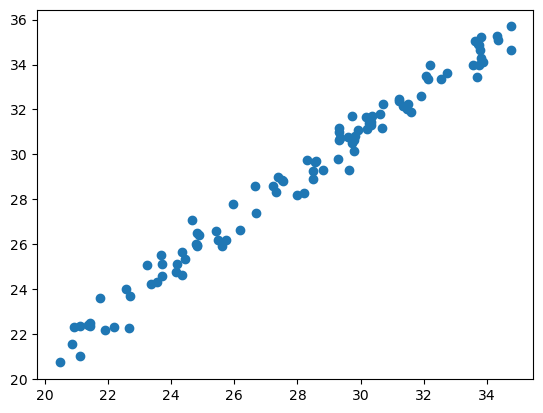

In [324]:
A = [0, 1, 1, 1, 0]
func = periodic_func(A, 0.5)
plt.plot(t, func, marker='o', linestyle='none')
plt.show()

In [325]:
def fit_function(time, *a):
    return a[0] + a[1]*time + a[2]*np.sin(a[4] * time) + a[3]*np.cos(a[4] * time)

In [326]:
#init_vals = [0.0 for x in range(5)]
#popt, pcov = curve_fit(fit_function, t, func, p0=init_vals)

Hmm, seems like our uncertainty is so high its trouble finding a fit, I'll try lowering the uncertainty until we get a fit

In [327]:
func = periodic_func(A, 0.1)
init_vals = [0.0 for x in range(5)]
popt, pcov = curve_fit(fit_function, t, func, p0=init_vals)

Interestingly, at this uncertainty the  a fit is found some of the time, I'll lower it by another 50%

[-0.30273728  1.04332091 -0.45298061 -0.00390816 -0.10515069]
[63.35311302  2.11318686 31.01835697 33.30788875  2.47706681]


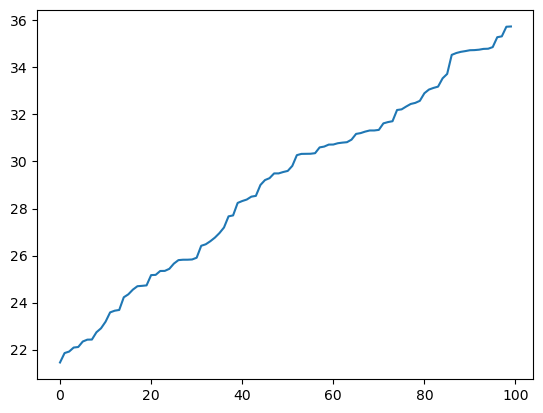

In [328]:
func = periodic_func(A, 0.05)
init_vals = [0.0 for x in range(5)]
popt, pcov = curve_fit(fit_function, t, func, p0=init_vals)
perr = np.sqrt(np.diag(pcov))

print(popt)
print(perr)
plt.plot(periodic_func(popt, 0))

These fit parameters seem way off from original function, and plotting our fit it looks a bit odd. The errors are also significantly larger than the uncertainty we entered

[1.00560578 0.99958406 0.         0.         0.        ]
[inf inf inf inf inf]


/Users/sdmceachin/miniconda3/envs/phys441/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


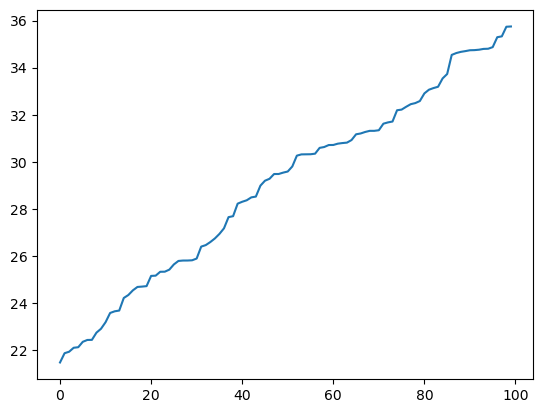

In [329]:
def fit_function_2(time, *a):
    return a[0] + a[1] * time + a[2]*np.sin(a[3] * time + a[4])

popt, pcov = curve_fit(fit_function_2, t, func, p0=init_vals)
perr = np.sqrt(np.diag(pcov))

print(popt)
print(perr)
plt.plot(periodic_func(popt, 0))

Looks like this fit is exactly the same